In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import string

In [2]:
DF=pd.read_csv('spam.csv',encoding='latin-1')
DF.head(10)

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
DF=DF.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
DF.head()

,Unnamed: 0,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
DF.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
DF.shape

(5572, 3)

In [6]:
for i in range(0,5572):
    if DF['v1'][i]=="spam":
        DF['v1'][i]=1
    else:
        DF['v1'][i]=0
DF['v1']

<ipython-input-6-f3fa14d81fa4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['v1'][i]=0
<ipython-input-6-f3fa14d81fa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['v1'][i]=1


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: object

In [7]:
DF.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [8]:
DF.rename(columns={'v1':'target','v2':'text'},inplace=True)
DF.sample(10)

,Unnamed: 0,target,text
250,250,0,Ranjith cal drpd Deeraj and deepak 5min hold
5389,5389,0,Ok.ok ok..then..whats ur todays plan
1638,1638,0,Great comedy..cant stop laughing da:)
3988,3988,0,Ok lor. Anyway i thk we cant get tickets now c...
1109,1109,0,S s..first time..dhoni rocks...
1208,1208,0,Also maaaan are you missing out
5061,5061,0,Havent stuck at orchard in my dad's car. Going...
2869,2869,1,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
722,722,0,That is wondar full flim.
64,64,0,Ok lar i double check wif da hair dresser alre...


In [9]:
DF.duplicated().sum()

0

In [10]:
DF=DF.drop_duplicates(keep='first')
DF.duplicated().sum()

0

In [11]:
DF.shape

(5572, 3)

Data Analysis

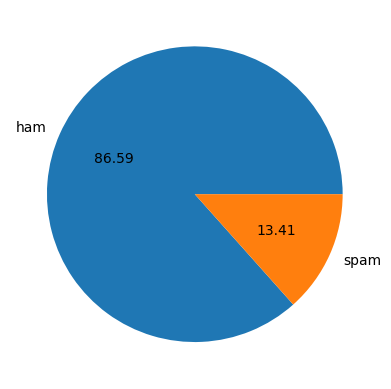

In [12]:
plt.pie(DF['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
DF['num_char']=DF['text'].apply(len)
DF.head()

,Unnamed: 0,target,text,num_char
0,0,0,"Go until jurong point, crazy.. Available only ...",111
1,1,0,Ok lar... Joking wif u oni...,29
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,3,0,U dun say so early hor... U c already then say...,49
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
DF['num_word']=DF['text'].apply(lambda x:len(nltk.word_tokenize(x)))
DF.head()

,Unnamed: 0,target,text,num_char,num_word
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,1,0,Ok lar... Joking wif u oni...,29,8
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,3,0,U dun say so early hor... U c already then say...,49,13
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
DF['num_sent']=DF['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
DF.head()

,Unnamed: 0,target,text,num_char,num_word,num_sent
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,0,Ok lar... Joking wif u oni...,29,8,2
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,0,U dun say so early hor... U c already then say...,49,13,1
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
DF.describe()

,Unnamed: 0,num_char,num_word,num_sent
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,2785.500000,80.333094,18.700826,1.997846
std,1608.642181,59.842934,13.743217,1.522285
min,0.000000,2.000000,1.000000,1.000000
25%,1392.750000,36.000000,9.000000,1.000000
50%,2785.500000,61.000000,15.000000,2.000000
75%,4178.250000,122.000000,27.000000,2.000000
max,5571.000000,910.000000,220.000000,38.000000


<Axes: xlabel='num_sent', ylabel='Count'>

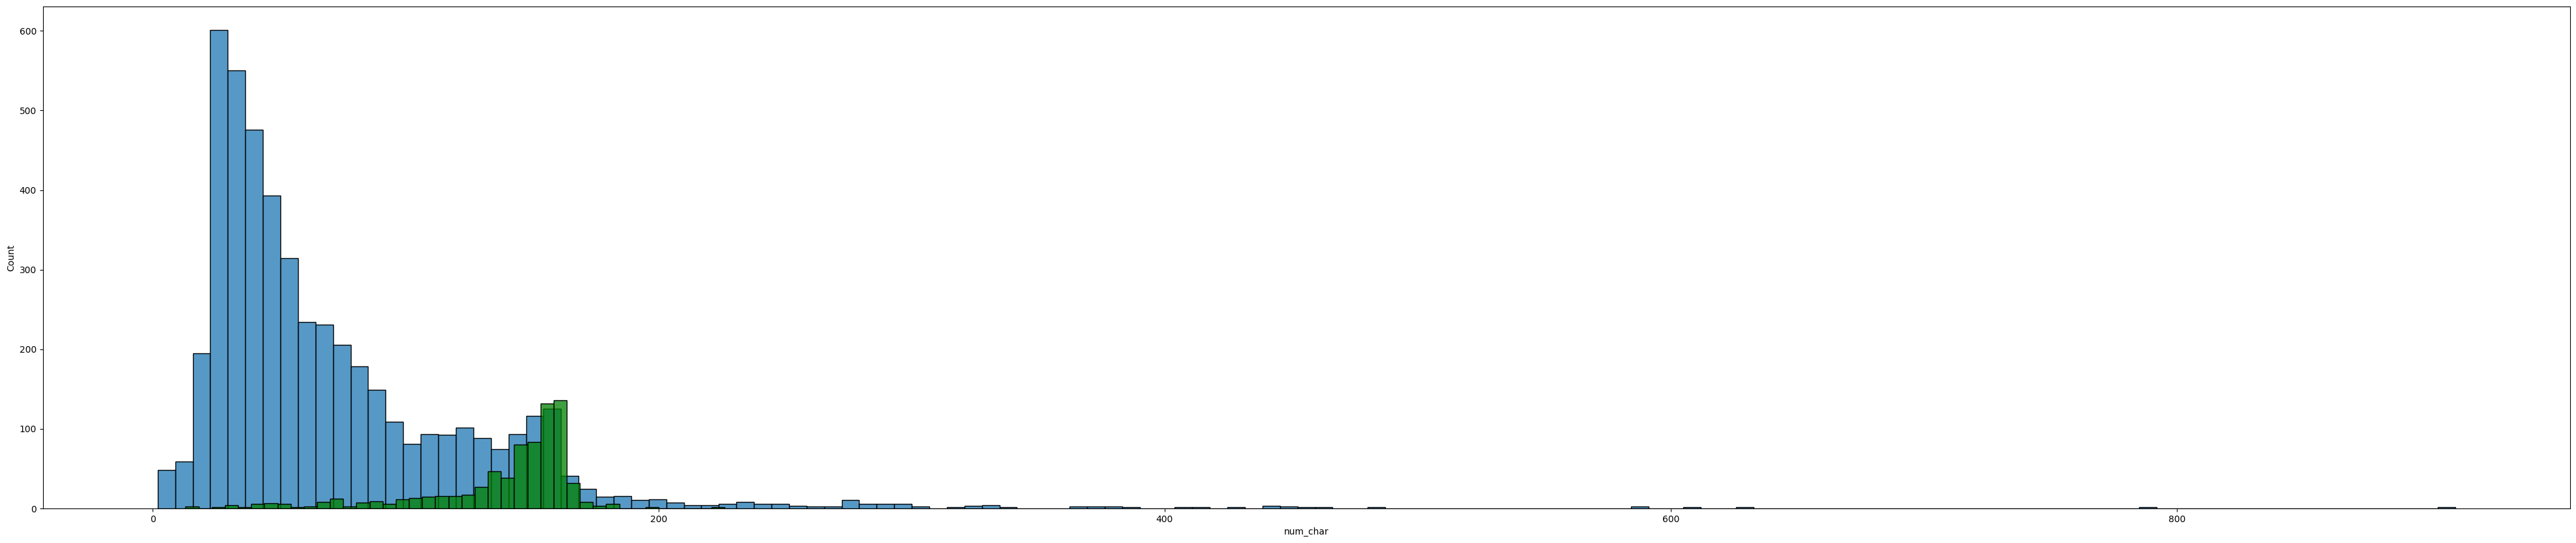

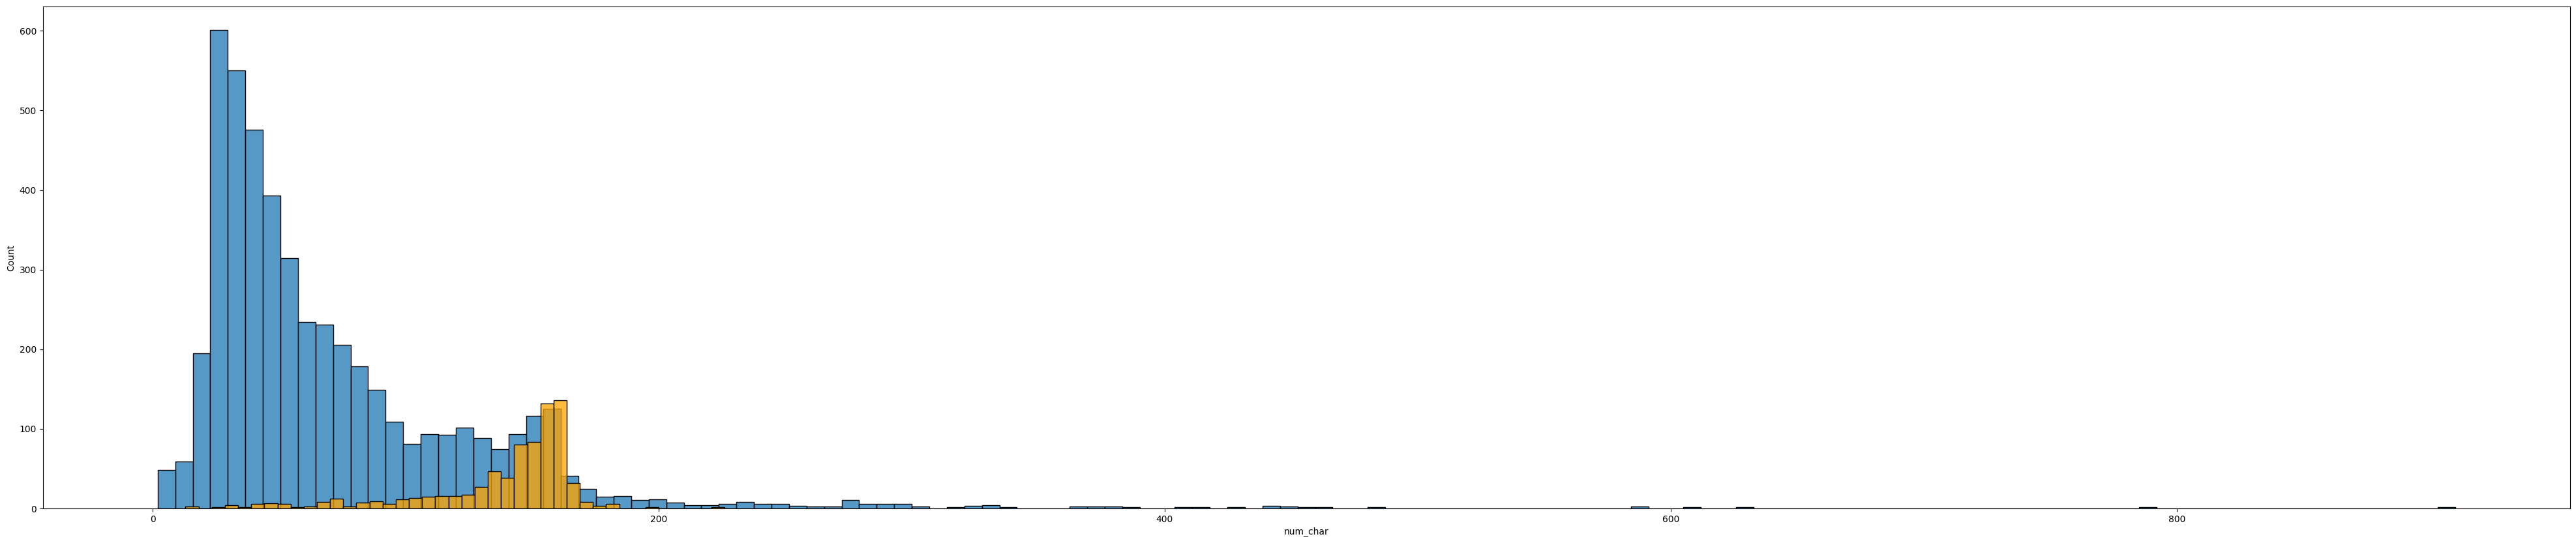

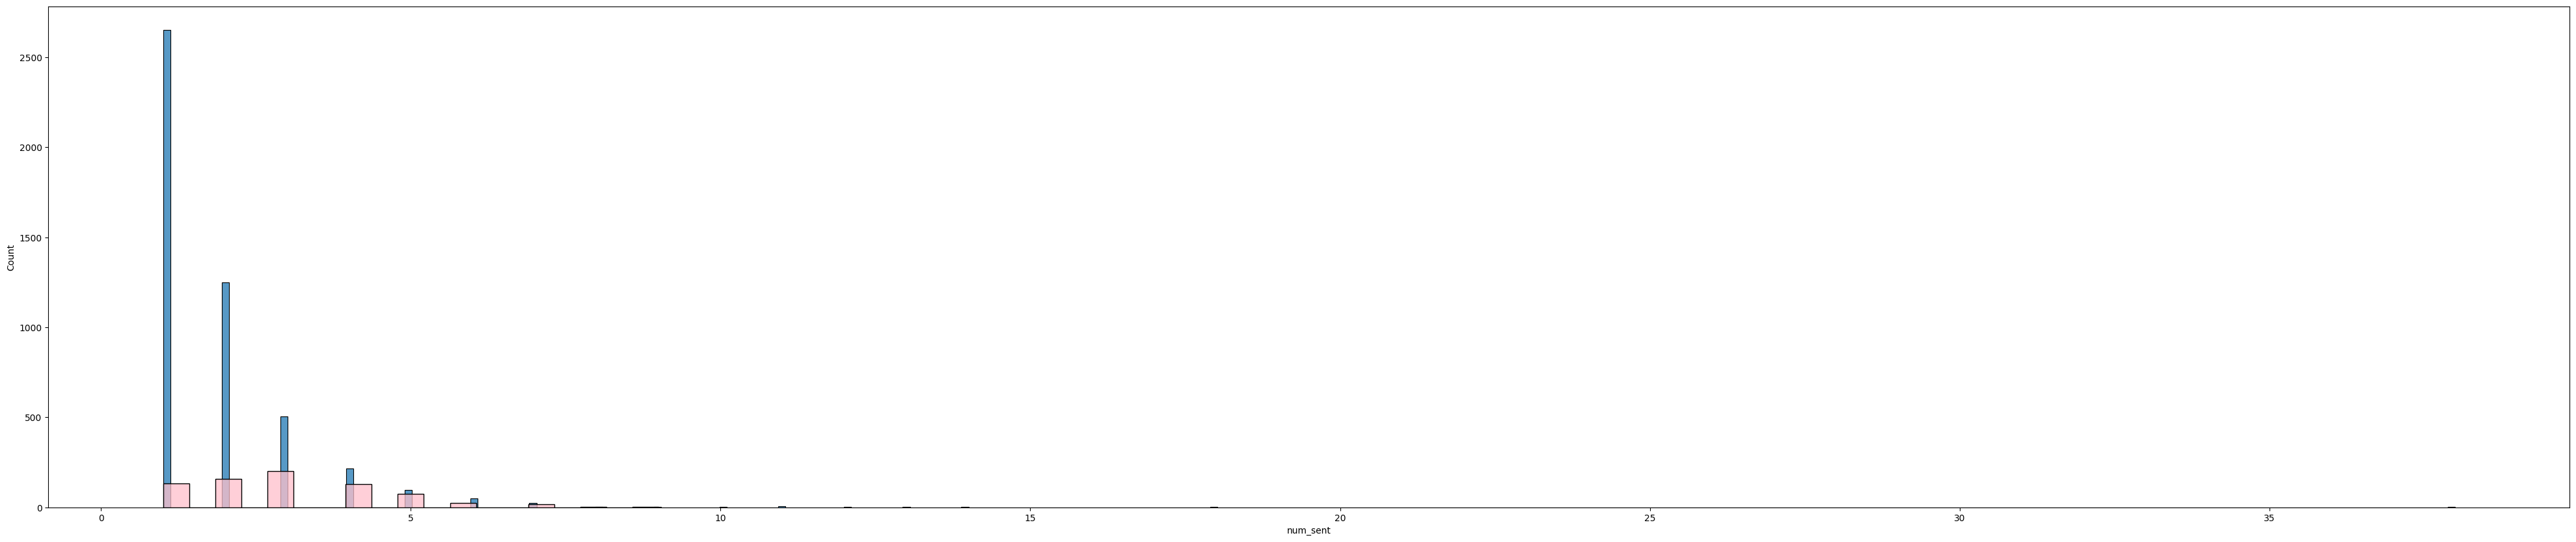

In [18]:
plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_char'])
sns.histplot(DF[DF['target']==1]['num_char'],color='green')

plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_char'])
sns.histplot(DF[DF['target']==1]['num_char'],color='orange')

plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_sent'])
sns.histplot(DF[DF['target']==1]['num_sent'],color='pink')

<Figure size 3000x1000 with 0 Axes>

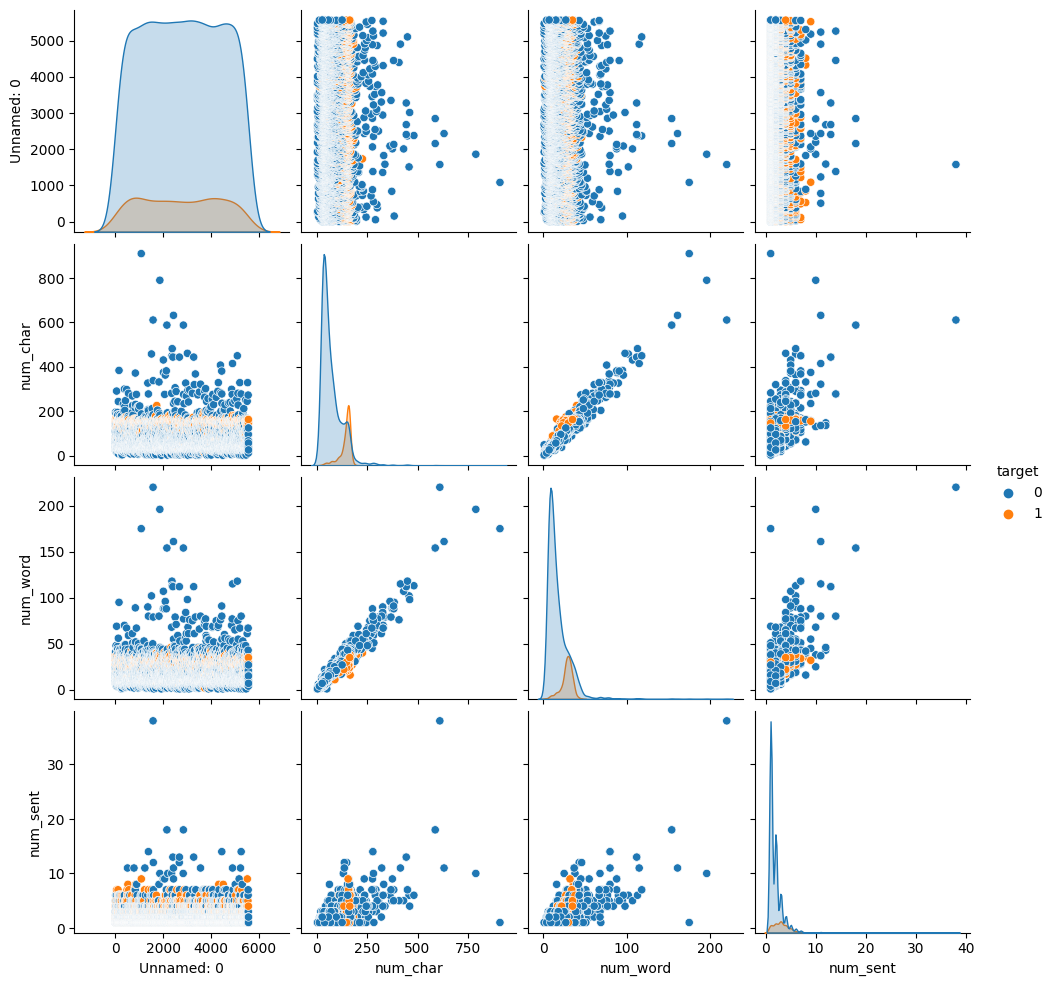

In [19]:
plt.figure(figsize=(30,10))
sns.pairplot(DF,hue='target')

<ipython-input-20-a8b24e2caea2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF.corr(),annot=True)


<Axes: >

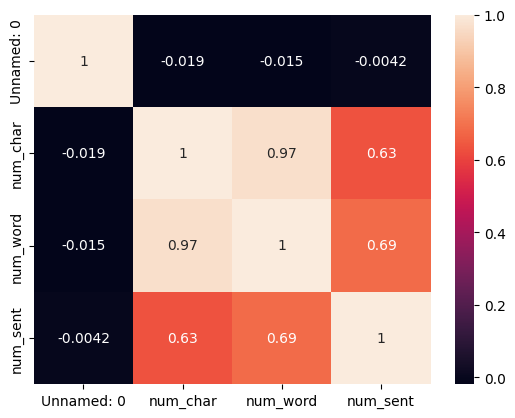

In [20]:
sns.heatmap(DF.corr(),annot=True)

In [21]:
DF.head()

,Unnamed: 0,target,text,num_char,num_word,num_sent
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,0,Ok lar... Joking wif u oni...,29,8,2
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,0,U dun say so early hor... U c already then say...,49,13,1
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
DF.describe()

,Unnamed: 0,num_char,num_word,num_sent
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,2785.500000,80.333094,18.700826,1.997846
std,1608.642181,59.842934,13.743217,1.522285
min,0.000000,2.000000,1.000000,1.000000
25%,1392.750000,36.000000,9.000000,1.000000
50%,2785.500000,61.000000,15.000000,2.000000
75%,4178.250000,122.000000,27.000000,2.000000
max,5571.000000,910.000000,220.000000,38.000000


Processing of data

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('sleeping')

'sleep'

In [24]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
      y.append(ps.stem(i))
            
    return " ".join(y)

In [25]:
DF.head(10)

,Unnamed: 0,target,text,num_char,num_word,num_sent
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,0,Ok lar... Joking wif u oni...,29,8,2
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,0,U dun say so early hor... U c already then say...,49,13,1
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,5,1,FreeMsg Hey there darling it's been 3 week's n...,150,39,4
6,6,0,Even my brother is not like to speak with me. ...,77,18,2
7,7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,8,1,WINNER!! As a valued network customer you have...,160,32,5
9,9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
